In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ("ignore")

In [2]:
df=pd.read_csv('TMeURO.csv')

In [3]:
df.head()

,order_id,product,category,price,quantity,payment_method,date,total,Month,Discount,City Code,Order Priority Code,Latitude,Longtitude
0,1,Watch,Electronics,12652.30,4,Easypaisa,01/01/2023,50609.20,January,0.0,1.0,2.0,1.0,0.0
1,2,Bag,Fashion,20053.64,2,Credit Card,02/01/2023,40107.28,January,0.1,1.0,2.0,1.0,0.0
2,3,Shoes,Fashion,13274.17,2,JazzCash,03/01/2023,26548.34,January,0.1,1.0,2.0,1.0,0.0
3,4,Bag,Electronics,15332.08,1,COD,04/01/2023,15332.08,January,0.1,1.0,2.0,1.0,0.0
4,5,Bag,Accessories,23165.07,1,Debit Card,05/01/2023,23165.07,January,0.0,1.0,NaN,1.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_id             506 non-null    int64  
 1   product              506 non-null    object 
 2   category             506 non-null    object 
 3   price                506 non-null    float64
 4   quantity             506 non-null    int64  
 5   payment_method       506 non-null    object 
 6   date                 506 non-null    object 
 7   total                506 non-null    float64
 8   Month                506 non-null    object 
 9   Discount             506 non-null    float64
 10  City Code            491 non-null    float64
 11  Order Priority Code  487 non-null    float64
 12  Latitude             506 non-null    float64
 13  Longtitude           506 non-null    float64
dtypes: float64(7), int64(2), object(5)
memory usage: 55.5+ KB


In [5]:
df.drop(['Latitude','Longtitude'], axis=1, inplace=True)
df.head(2)

,order_id,product,category,price,quantity,payment_method,date,total,Month,Discount,City Code,Order Priority Code
0,1,Watch,Electronics,12652.30,4,Easypaisa,01/01/2023,50609.20,January,0.0,1.0,2.0
1,2,Bag,Fashion,20053.64,2,Credit Card,02/01/2023,40107.28,January,0.1,1.0,2.0


In [6]:
df.isnull().sum()

order_id                0
product                 0
category                0
price                   0
quantity                0
payment_method          0
date                    0
total                   0
Month                   0
Discount                0
City Code              15
Order Priority Code    19
dtype: int64

In [7]:
df = df.rename(columns = {'City Code': 'City','Order Priority Code': 'Order Priority'})
df.head(1)

,order_id,product,category,price,quantity,payment_method,date,total,Month,Discount,City,Order Priority
0,1,Watch,Electronics,12652.3,4,Easypaisa,01/01/2023,50609.2,January,0.0,1.0,2.0


In [8]:
df[df.duplicated()]

,order_id,product,category,price,quantity,payment_method,date,total,Month,Discount,City,Order Priority
500,3,Shoes,Fashion,13274.17,2,JazzCash,03/01/2023,26548.34,January,0.1,1.0,2.0
501,4,Bag,Electronics,15332.08,1,COD,04/01/2023,15332.08,January,0.1,1.0,2.0
502,18,Headphones,Electronics,14085.56,2,Debit Card,18/01/2023,28171.12,January,0.0,1.0,2.0
503,19,Laptop,Accessories,53657.14,4,Debit Card,19/01/2023,214628.56,January,0.1,1.0,2.0
504,20,Watch,Fashion,74385.39,4,Credit Card,20/01/2023,297541.56,January,0.0,1.0,2.0
505,21,Bag,Electronics,44762.65,4,COD,21/01/2023,179050.60,January,0.0,1.0,2.0


In [9]:
df= df.drop_duplicates()

In [10]:
df[df.duplicated()]

,order_id,product,category,price,quantity,payment_method,date,total,Month,Discount,City,Order Priority


In [11]:
df.isnull().sum()

order_id           0
product            0
category           0
price              0
quantity           0
payment_method     0
date               0
total              0
Month              0
Discount           0
City              15
Order Priority    19
dtype: int64

In [12]:
city_code = {1: 'Karachi',2 : 'Lahore',3 : 'Islamabad',4 : 'Faisalabad',5 : 'Quetta',6 : 'Peshawar'}
order_priority_code = {0 : 'LOW',1 : 'MEDIUM',2 : 'HIGH',3 : 'CRITICAL'}
df['City']=df['City'].map(city_code)
df['Order Priority']= df['Order Priority'].map(order_priority_code)
df.head()

,order_id,product,category,price,quantity,payment_method,date,total,Month,Discount,City,Order Priority
0,1,Watch,Electronics,12652.30,4,Easypaisa,01/01/2023,50609.20,January,0.0,Karachi,HIGH
1,2,Bag,Fashion,20053.64,2,Credit Card,02/01/2023,40107.28,January,0.1,Karachi,HIGH
2,3,Shoes,Fashion,13274.17,2,JazzCash,03/01/2023,26548.34,January,0.1,Karachi,HIGH
3,4,Bag,Electronics,15332.08,1,COD,04/01/2023,15332.08,January,0.1,Karachi,HIGH
4,5,Bag,Accessories,23165.07,1,Debit Card,05/01/2023,23165.07,January,0.0,Karachi,NaN


In [13]:
df['City']=df['City'].fillna(df['City'].mode()[0])

In [14]:
df['Order Priority']=df['Order Priority'].fillna(df['Order Priority'].mode()[0])

In [15]:
df.isnull().sum()

order_id          0
product           0
category          0
price             0
quantity          0
payment_method    0
date              0
total             0
Month             0
Discount          0
City              0
Order Priority    0
dtype: int64

##Top 5 Best Selling Products##

In [16]:
df1=df.groupby('product')['total'].mean().round()
df1

product
Bag           103993.0
Headphones    109468.0
Laptop        105441.0
Mobile         94206.0
Shoes         107850.0
Watch          95827.0
Name: total, dtype: float64

In [17]:
df1.index.to_list()

['Bag', 'Headphones', 'Laptop', 'Mobile', 'Shoes', 'Watch']

In [18]:
values = df1.to_list()
values

[103993.0, 109468.0, 105441.0, 94206.0, 107850.0, 95827.0]

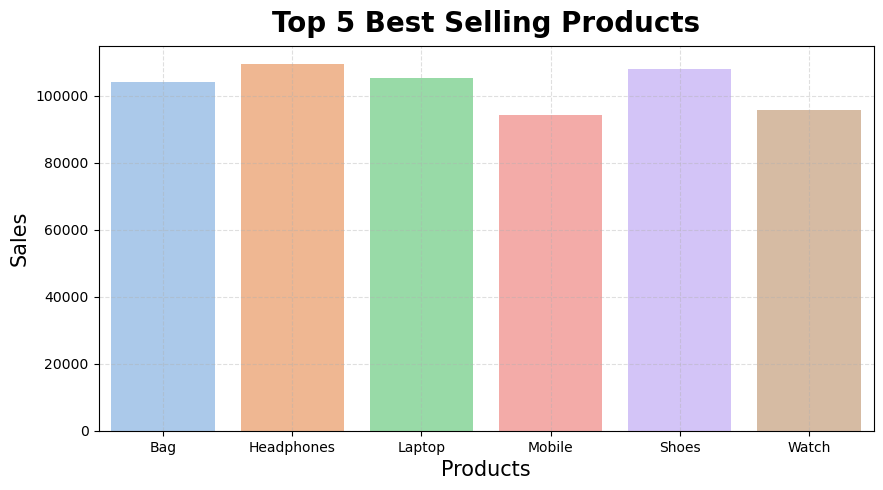

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(x= df1.index,y=values,palette='pastel')
plt.title('Top 5 Best Selling Products', fontweight= 'bold', fontsize= 20, pad = 10)
plt.xlabel('Products', fontsize = 15)
plt.ylabel('Sales', fontsize = 15)
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

Observations:

The top 5 products are Headphones, Shoes, Laptop, Bag, and Mobile.

Headphones have the highest sales, slightly above Shoes and Laptop.

Mobile and Watch have comparatively lower sales among the top 5.

Sales differences are moderate, indicating that demand is fairly spread across multiple products.

Payment Method Distribution

In [20]:
df2=df.payment_method.value_counts()
df2

payment_method
JazzCash       112
Credit Card    107
Easypaisa      105
COD             97
Debit Card      79
Name: count, dtype: int64

In [21]:
df2.index.to_list()

['JazzCash', 'Credit Card', 'Easypaisa', 'COD', 'Debit Card']

In [22]:
values1 = df2.to_list()
values1

[112, 107, 105, 97, 79]

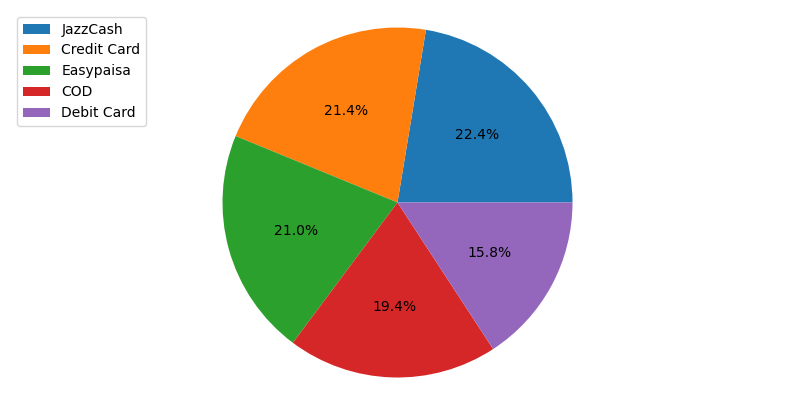

In [23]:
plt.figure(figsize = (10,5))
plt.pie(x=values1,labels= None,autopct= '%1.1f%%')
plt.legend(labels= df2.index, loc = 'upper left')
plt.axis('equal')
plt.show()

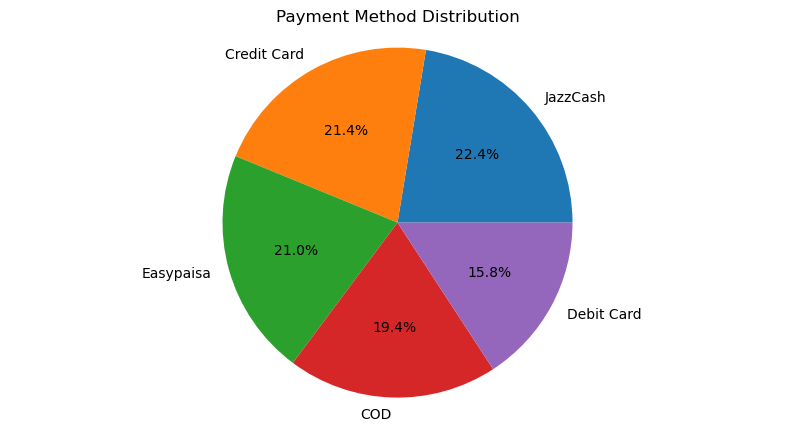

In [24]:
plt.figure(figsize = (10,5))
plt.pie(x=values1,labels= df2.index,autopct= '%1.1f%%')
plt.axis('equal')
plt.title('Payment Method Distribution')
plt.show()

Observations:

The distribution is fairly balanced among JazzCash (22.4%), Credit Card (21.4%), Easypaisa (21%), COD (19.4%), with Debit Card (15.8%) being slightly lower.

Digital payment methods dominate, but COD still accounts for nearly 20% of transactions.

Monthwise Sales

In [25]:
df3=df.groupby('Month')['total'].mean().round(2)
df3

Month
April        104595.90
August        82493.18
December     127502.06
February      97281.41
January      100619.59
July          86725.02
June          95364.00
March        108243.87
May          131329.91
November      93505.11
October      101272.41
September     83863.87
Name: total, dtype: float64

In [26]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df3.index = pd.Categorical(df3.index, categories=month_order, ordered=True)
df3 = df3.sort_index()
df3

January      100619.59
February      97281.41
March        108243.87
April        104595.90
May          131329.91
June          95364.00
July          86725.02
August        82493.18
September     83863.87
October      101272.41
November      93505.11
December     127502.06
Name: total, dtype: float64

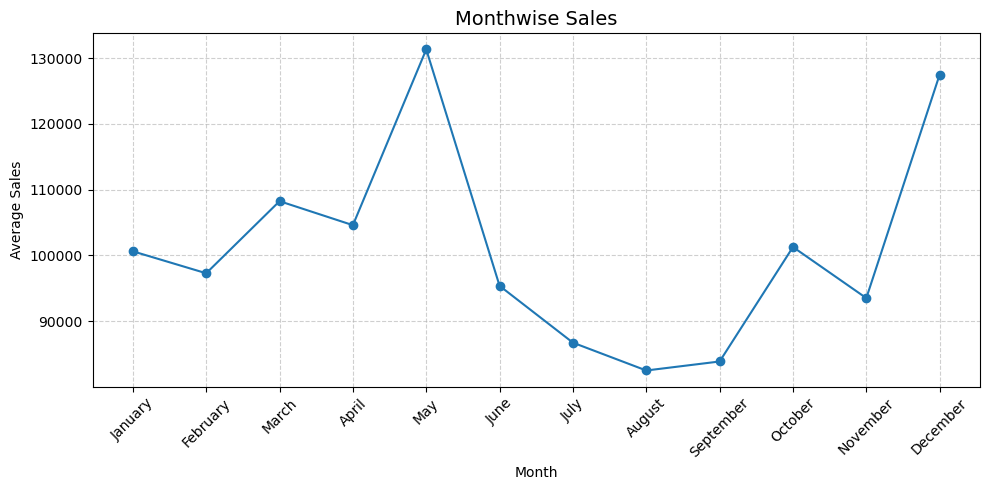

In [27]:
plt.figure(figsize=(10,5))
plt.plot(df3.index, df3.values, marker='o')

plt.title('Monthwise Sales', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Observations:

Sales fluctuate across the year.

Peak months appear to be May and December, indicating high seasonal demand.

Lowest sales occur around August.

Other months have moderate sales, showing some consistency but with clear peaks and dips.

Show City wise sales

In [28]:
df4=df.groupby('City')['total'].mean().round(2)
df4

City
Faisalabad    121519.21
Islamabad     104270.28
Karachi       105435.75
Lahore        103926.28
Peshawar       87239.66
Quetta         97820.83
Name: total, dtype: float64

In [29]:
df4.index.to_list()

['Faisalabad', 'Islamabad', 'Karachi', 'Lahore', 'Peshawar', 'Quetta']

In [30]:
values4= df4.to_list()
values4

[121519.21, 104270.28, 105435.75, 103926.28, 87239.66, 97820.83]

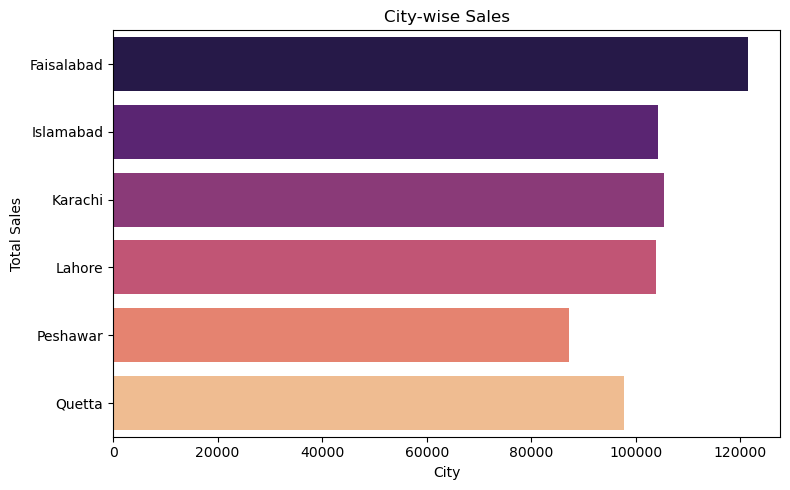

In [31]:
plt.figure(figsize=(8, 5))
sns.barplot(y= df4.index,x=values4,palette='magma')
plt.title("City-wise Sales")
plt.ylabel("Total Sales")
plt.xlabel("City")
plt.tight_layout()
plt.show()

Observations:

1. Top Performing City:
   - Faisalabad had the highest total sales, reaching around 120,000 units.

2. Mid-range Performers:
   - Islamabad, Karachi, and Lahore show similar performance, each just above 100,000 sales.
   - Slight differences among them, but all are closely aligned.

3. Lowest Sales:
   - Peshawar had the lowest sales, around 85,000.
   - Quetta performed slightly better than Peshawar, close to 95,000.


Show monthly Sales by Category

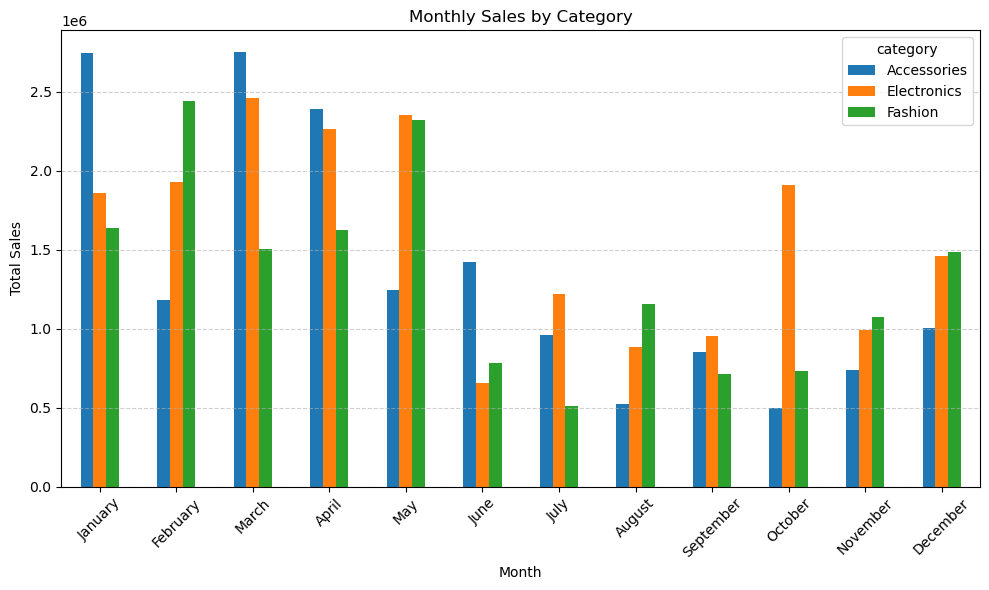

In [32]:
pivot_df5 = df.pivot_table(index='Month', columns='category', values='total', aggfunc='sum').fillna(0)
pivot_df5.index = pd.Categorical(pivot_df5.index, categories=month_order, ordered=True)
pivot_df5 = pivot_df5.sort_index()
pivot_df5.plot(kind='bar', figsize=(10,6))
plt.title('Monthly Sales by Category')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Observations:

1. Top Performing Months:
   - Accessories had the highest sales in January and March, both peaking over 2.7 million.
   - Electronics and Fashion saw peak sales in May (both nearly equal, around 2.35 million).

2. Low Performing Months:
   - All three categories had the lowest sales in August and October.
   - Fashion was lowest in July and October.
   - Accessories sales dropped significantly in August and October.
   - Electronics dipped the most in June and August.

3. Consistent Performance:
   - Electronics showed more consistent sales throughout the year compared to the other categories.
   - Fashion had more fluctuations, with strong months like May and weak ones like July and October.

4. Category Comparison:
   - Accessories dominated in the first quarter (Jan–Mar).
   - Electronics led in October with the highest value across all categories that month.
   - Fashion held strong in February and May, but underperformed mid-year.


Insights:
Focus marketing and stock management on Headphones, Shoes, and Laptop to maximize revenue.

Products like Mobile and Watch may need promotion or bundling to boost sales.

Customers prefer a mix of digital and cash-on-delivery options.

Offering promotions for Debit Card payments may help increase adoption.

The business should maintain support for multiple payment methods to satisfy different customer preferences.

Business should prepare for inventory and marketing campaigns around May and December.

Low months like August could benefit from promotional offers to boost sales.

Planning cash flow and staffing based on these trends can optimize operations.

Faisalabad stands out as a strong market; this city may benefit from increased focus—like marketing, product range expansion, or logistics investment.

Islamabad, Karachi, and Lahore are consistent markets with good sales, indicating stable customer demand.

Peshawar and Quetta show room for growth—potentially due to market access, awareness, or supply limitations. These areas might benefit from localized strategies or outreach.

The sales variation across cities highlights the importance of region-specific strategies in targeting and planning.

Seasonal trends are visible — early months (Jan–May) tend to have higher sales across all categories, possibly due to post-holiday or seasonal promotions.